#### Crime Per Person Per Acre 

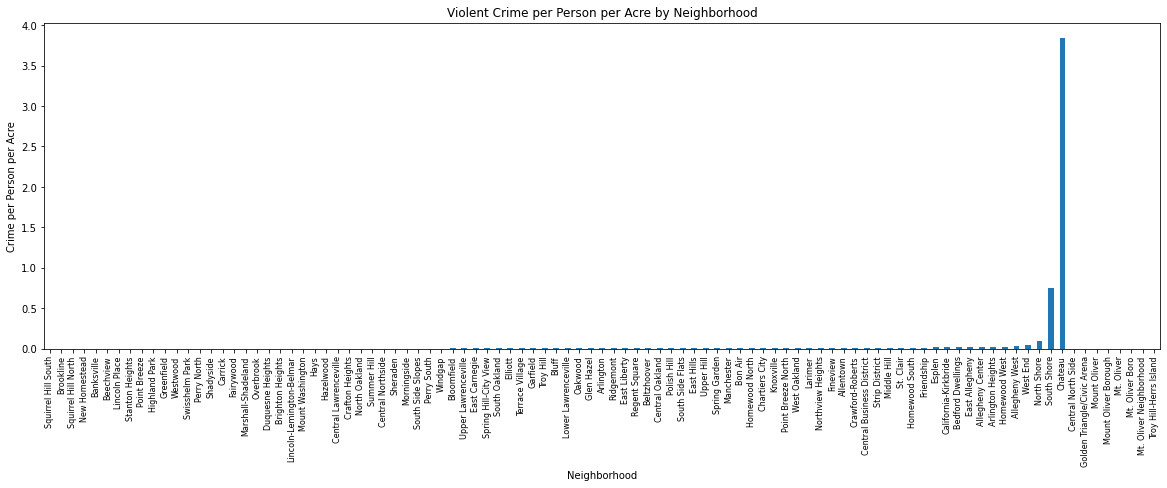

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


land_df = pd.read_csv('LandUsePittNeighborhoods.csv')
crime_df = pd.read_csv("Incidents.csv")
population_df = pd.read_csv('Population.csv')

# This line filters out incidents that occurred outside the specified area. It checks if the 'INCIDENTNEIGHBORHOOD' 
# column does not contain the string "Outside" and keeps only those rows.

crime_df = crime_df[crime_df['INCIDENTNEIGHBORHOOD'].str.contains("Outside", na=False) == False]
crime_per_person_per_acre = (
    crime_df.pivot_table(index="INCIDENTNEIGHBORHOOD", aggfunc="size") /
    population_df.set_index("Neighborhood")["Estimate; Total"] /
    land_df.set_index("Neighborhood")['Land Area (acres)']
)

# Sorting values
crime_per_person_per_acre = crime_per_person_per_acre.sort_values(ascending=True)

# Plotting the graph
ax = crime_per_person_per_acre.plot.bar(
    figsize=(20, 6),
    legend=False,
    xlabel='Neighborhood',
    ylabel='Crime per Person per Acre',
    title='Violent Crime per Person per Acre by Neighborhood',
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
plt.show()



In [5]:
# We created another data visualization. It is a table. This table shows the exact numbers for the cities with the lowest Crime per Person per Acre.
# That way we can see the exact result and not rely on the barely visible bars.

import pandas as pd

# Read the necessary data files
land_df = pd.read_csv('LandUsePittNeighborhoods.csv')
crime_df = pd.read_csv("Incidents.csv")
population_df = pd.read_csv('Population.csv')

# Filter crime data
crime_df = crime_df[crime_df['INCIDENTNEIGHBORHOOD'].str.contains("Outside", na=False) == False]

# Calculate Crime per Person per Acre
crime_per_person_per_acre = (
    crime_df.pivot_table(index="INCIDENTNEIGHBORHOOD", aggfunc="size") /
    population_df.set_index("Neighborhood")["Estimate; Total"] /
    land_df.set_index("Neighborhood")['Land Area (acres)']
)

# Create a DataFrame with the required information
crime_data = pd.DataFrame({
    'Crime': crime_df.groupby('INCIDENTNEIGHBORHOOD').size(),
    'Person': population_df.set_index('Neighborhood')['Estimate; Total'],
    'Acre': land_df.set_index('Neighborhood')['Land Area (acres)'],
    'Crime per Person per Acre': crime_per_person_per_acre
})

# Sort the DataFrame by the 'Crime per Person per Acre' column in ascending order
crime_data = crime_data.sort_values(by='Crime per Person per Acre')

# Display the DataFrame
print(crime_data)


                          Crime   Person     Acre  Crime per Person per Acre
Squirrel Hill South      7576.0  16042.0  1709.44                   0.000276
Brookline                7563.0  13160.0  1332.48                   0.000431
Squirrel Hill North      3992.0  11336.0   782.08                   0.000450
New Homestead             342.0    973.0   508.16                   0.000692
Banksville               1746.0   3858.0   620.16                   0.000730
...                         ...      ...      ...                        ...
Mount Oliver Borough        NaN   3399.0      NaN                        NaN
Mt. Oliver                  NaN    598.0    64.00                        NaN
Mt. Oliver Boro            97.0      NaN      NaN                        NaN
Mt. Oliver Neighborhood   117.0      NaN      NaN                        NaN
Troy Hill-Herrs Island    252.0      NaN      NaN                        NaN

[97 rows x 4 columns]


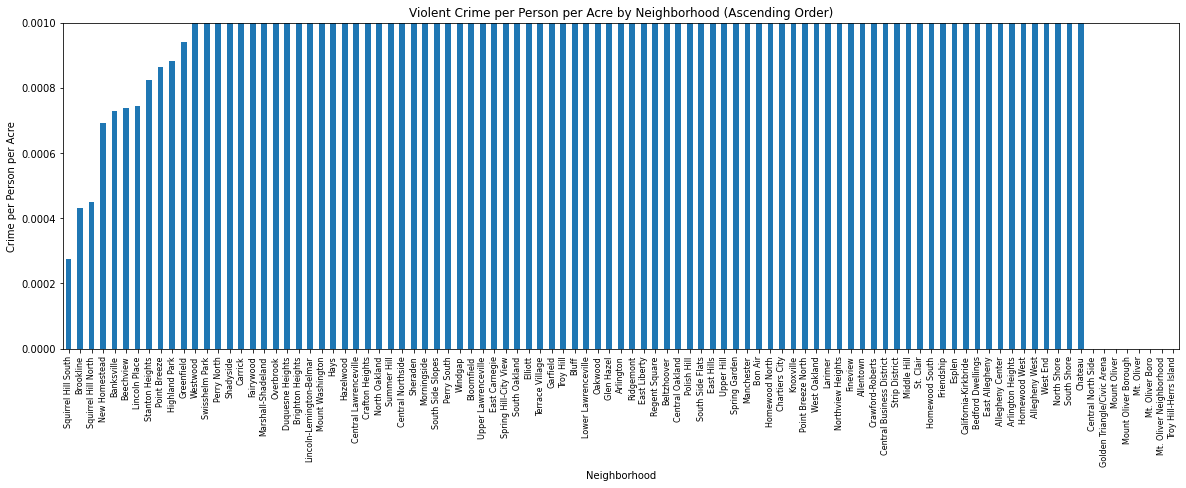

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the necessary data files
land_df = pd.read_csv('LandUsePittNeighborhoods.csv')
crime_df = pd.read_csv("Incidents.csv")
population_df = pd.read_csv('Population.csv')

# Filter crime data
crime_df = crime_df[crime_df['INCIDENTNEIGHBORHOOD'].str.contains("Outside", na=False) == False]

# Calculate Crime per Person per Acre
crime_per_person_per_acre = (
    crime_df.pivot_table(index="INCIDENTNEIGHBORHOOD", aggfunc="size") /
    population_df.set_index("Neighborhood")["Estimate; Total"] /
    land_df.set_index("Neighborhood")['Land Area (acres)']
)

# Sort the values for plotting
crime_per_person_per_acre = crime_per_person_per_acre.sort_values()

# Plot the graph
ax = crime_per_person_per_acre.plot.bar(
    figsize=(20, 6),
    legend=False,
    xlabel='Neighborhood',
    ylabel='Crime per Person per Acre',
    title='Violent Crime per Person per Acre by Neighborhood (Ascending Order)',
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# Set y-axis limits
# This is very important because we want to zoom in on those first few neighborhoods. 
ax.set_ylim(0, 0.001)

plt.show()
